<a href="https://colab.research.google.com/github/nathanschoeck/Computer-Vision/blob/main/Segmentation_as_Clustering_(k_Means).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Segmentation as clustering involves grouping similar pixels together based on their color or intensity. K-means clustering is a commonly used method for this task. Below is an example of implementing image segmentation using k-Means clustering using the OpenCV python library.

1. Import Libraries

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

2. Load the image

In [4]:
image_path = "/Girl_with_a_Pearl_Earring.jpg"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

3. Reshape the image into a 2D array of pixels

In [5]:
pixels = img.reshape((-1, 3))
pixels = np.float32(pixels)  # Convert to float32 for k-Means

4. Define criteria and apply k-Means clustering

In [6]:
# Criteria: (type, max_iter, epsilon)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3  # Number of clusters (segments)
_, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

5. Convert centers back to uint8 (original image data type)

In [7]:
centers = np.uint8(centers)

6. Replace pixels with their cluster centers

In [8]:
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img.shape)

7. Reshape labels to match the image dimensions (optional for visualization)

In [9]:
labels_image = labels.reshape(img.shape[:2])

8. Plot the original and segmented images

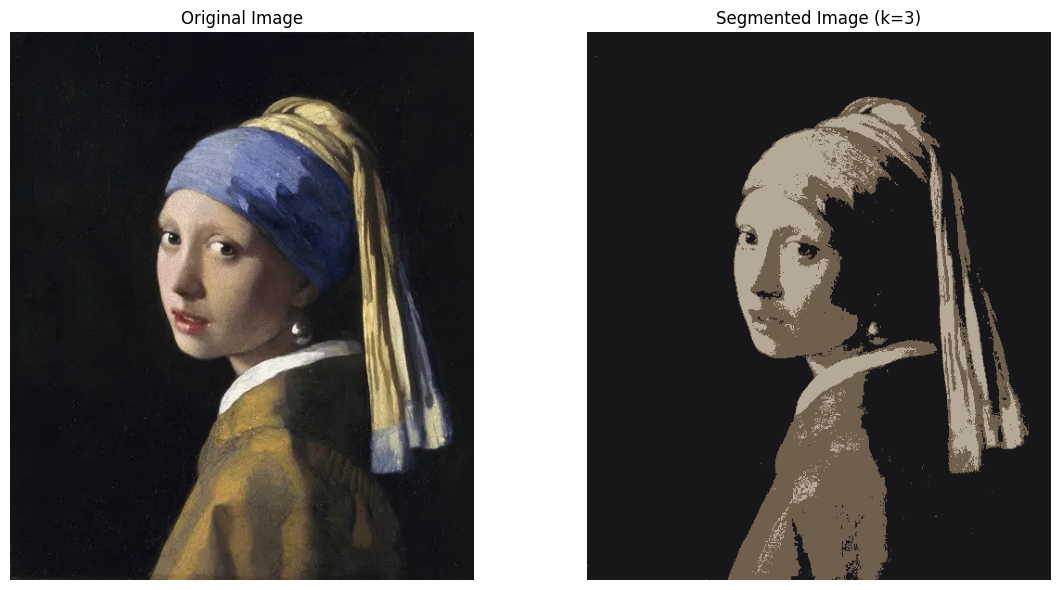

In [10]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title(f"Segmented Image (k={k})")
plt.axis("off")

plt.tight_layout()
plt.show()